In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)

In [2]:
df = pd.read_json('logins.json')

df['logins'] = 1

df = df.sort_values('login_time')

df = df.set_index('login_time')

In [3]:
df = df.resample('15min').agg(sum)

df['day_of_week'] = df.index.dayofweek
df['login_time'] = df.index
df = df[['login_time','logins','day_of_week']]

Look at dataframe:

In [4]:
df.tail()

,login_time,logins,day_of_week
login_time,,,
1970-04-13 17:45:00,1970-04-13 17:45:00,5,0
1970-04-13 18:00:00,1970-04-13 18:00:00,5,0
1970-04-13 18:15:00,1970-04-13 18:15:00,2,0
1970-04-13 18:30:00,1970-04-13 18:30:00,7,0
1970-04-13 18:45:00,1970-04-13 18:45:00,6,0


Look at a day:

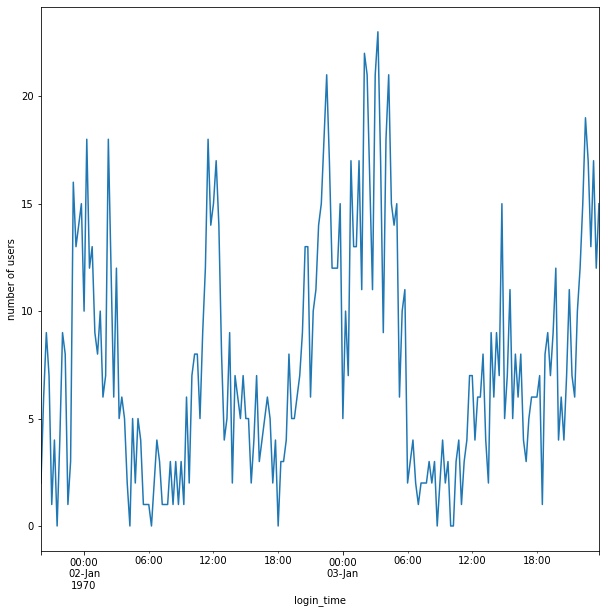

In [5]:
df.loc['1970-01-01':'1970-01-03']['logins'].plot()
plt.ylabel('number of users')
plt.show()

Missing entries:

In [6]:
df[df['logins'].isnull()]

,login_time,logins,day_of_week
login_time,,,


Boxplot of distribution:

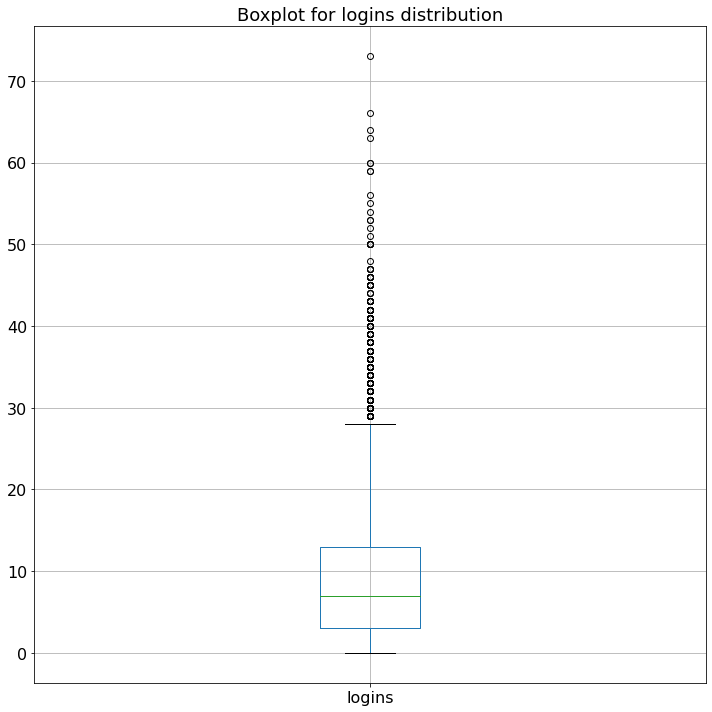

In [7]:
df.boxplot('logins', fontsize=16)
plt.title('Boxplot for logins distribution',fontsize=18)
plt.tight_layout()
plt.savefig('boxplot.jpeg')
plt.show()

In [8]:
df[df['logins']>70]

,login_time,logins,day_of_week
login_time,,,
1970-03-01 04:30:00,1970-03-01 04:30:00,73,6


Look at the average logins for each day of the week

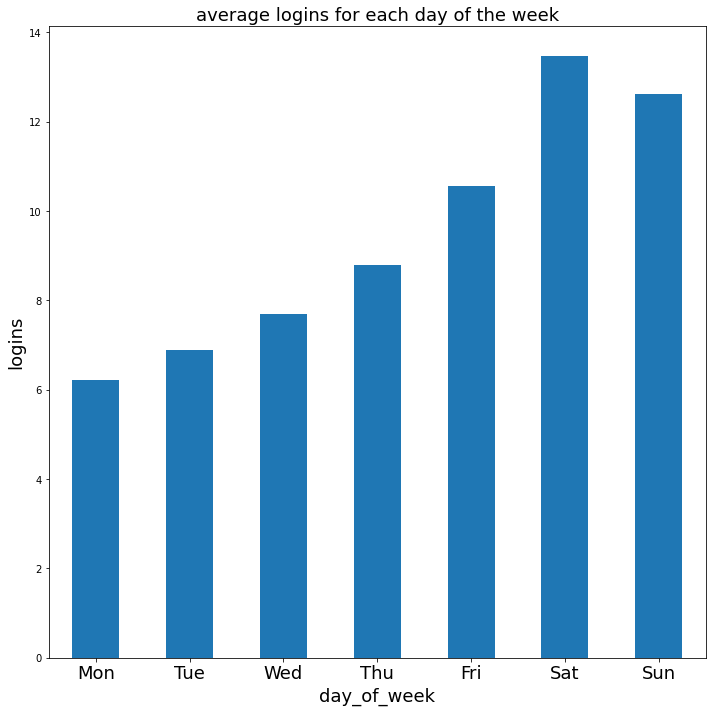

In [9]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

df.groupby('day_of_week').agg('mean').plot(kind='bar',legend=None)
plt.title('average logins for each day of the week', fontsize=18)
plt.ylabel('logins',fontsize=18)
plt.xlabel('day_of_week',fontsize=18)
plt.xticks(range(7),days, fontsize=18, rotation=0)
plt.tight_layout()
plt.savefig('avg_logins_day_of_week.jpeg')
plt.show()

Look at the average for each 15 minute period

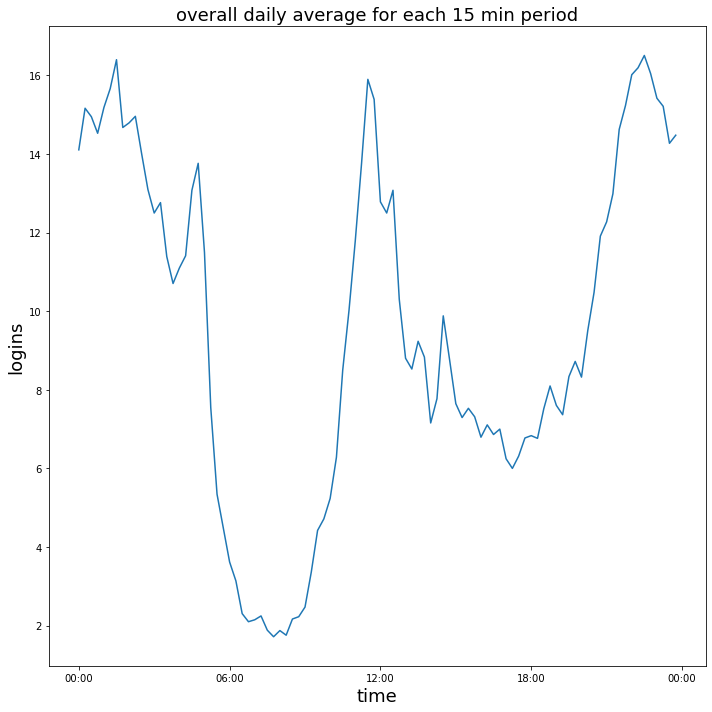

In [10]:
fifteen_min_avg = df[['logins']].groupby(df.index.time).agg('mean')
fifteen_min_avg.plot(legend=None)
plt.title('overall daily average for each 15 min period',fontsize=18)
plt.xlabel('time',fontsize=18)
plt.ylabel('logins',fontsize=18)
plt.xticks([i*6*3600 for i in range(5)],['00:00','06:00','12:00','18:00','00:00'])
plt.tight_layout()
plt.savefig('overall_avg_15_min.jpeg')
plt.show()

Look at the average for each 15 min period grouped by day of the week

In [11]:
for i in range(7):
    # obtain average number of logins during each 15 minute interval across the
    # three months; plot results
    daily = df[df['day_of_week']==i]
    fifteen_min_avg['%s'%(days[i])] = daily[['logins']].groupby(daily.index.time).agg('mean')

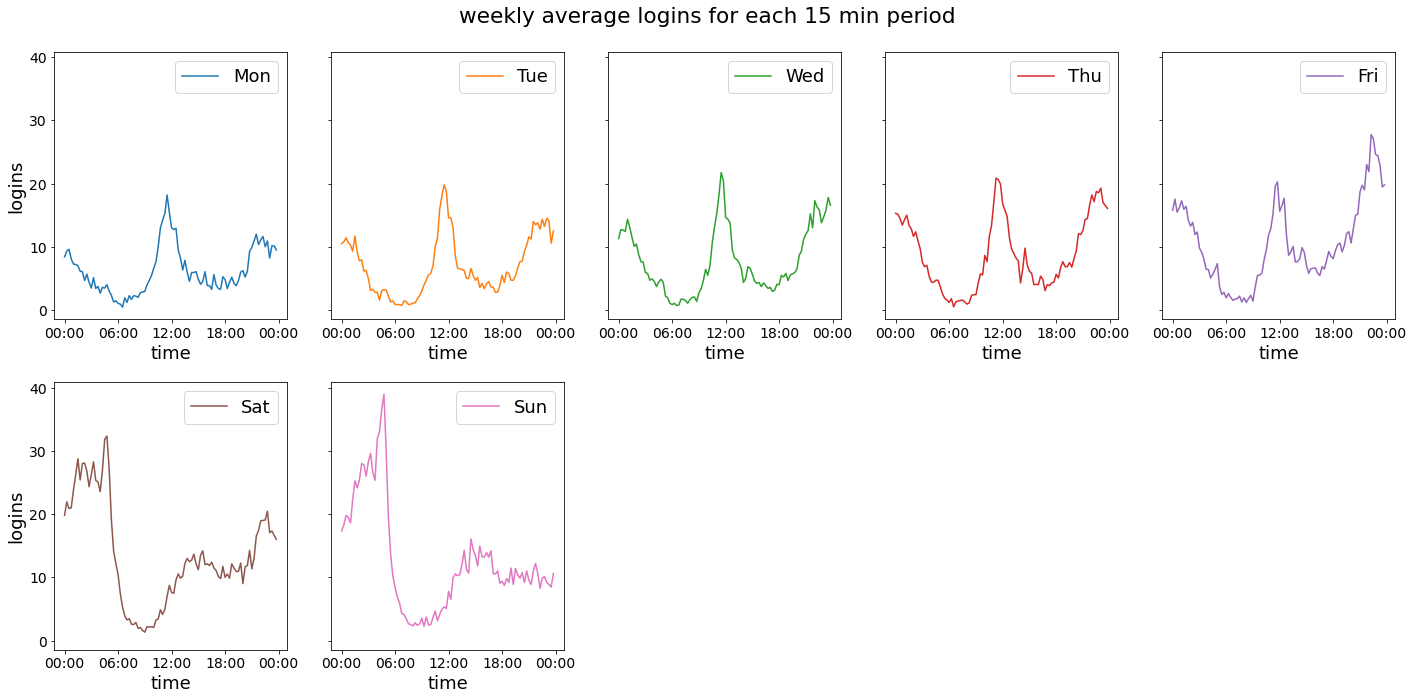

In [12]:

plt.rcParams.update({'font.size': 18})
fig = fifteen_min_avg[['Mon','Tue','Wed','Thu','Fri','Sat','Sun']].plot(subplots=True, layout=(2,5), 
                                                                        sharey=True, sharex=False, figsize=(20,10),
                                                                       xticks = [i*6*3600 for i in range(5)],
                                                                       fontsize=14, ylabel='logins',
                                                                       title='weekly average logins for each 15 min period')
plt.tight_layout()
plt.savefig('weekly_avg.jpeg')
plt.show()

Compare average logins for each 15 min period on a weekday vs. the weekend

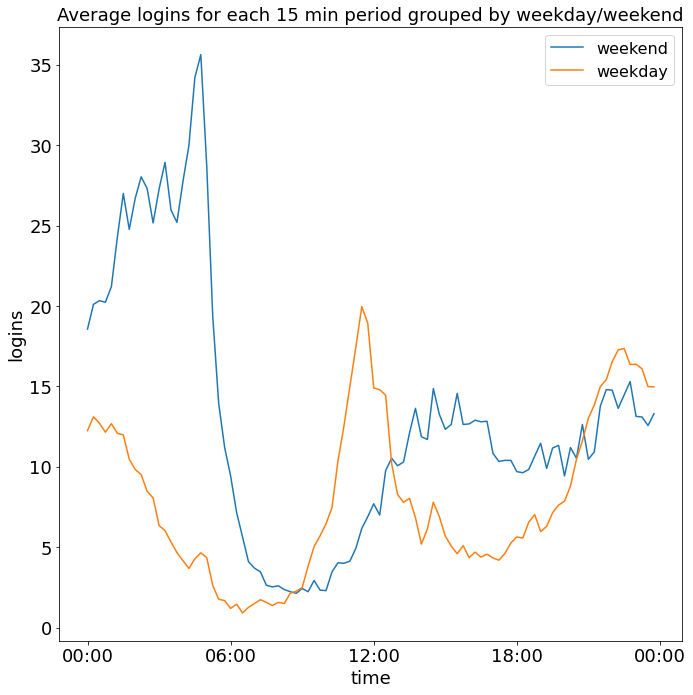

In [13]:
weekend = pd.concat([df[df['day_of_week']==i] for i in [5,6]], axis = 0)
weekday = pd.concat([df[df['day_of_week']==i] for i in range(5)], axis = 0)

fifteen_min_avg['weekend'] = weekend[['logins']].groupby(weekend.index.time).agg('mean')
fifteen_min_avg['weekday'] = weekday[['logins']].groupby(weekday.index.time).agg('mean')

fifteen_min_avg['weekend'].plot()
fifteen_min_avg['weekday'].plot()
plt.legend(fontsize=16)
plt.title('Average logins for each 15 min period grouped by weekday/weekend',fontsize=18)
plt.ylabel('logins',fontsize=18)
plt.xlabel('time',fontsize=18)
plt.xticks([i*6*3600 for i in range(5)],['00:00','06:00','12:00','18:00','00:00'])
plt.tight_layout()
plt.savefig('weekday_v_weekend.jpeg')
plt.show()